In [14]:
# Perform sentiment analysis on the clean_biden_tweets.csv file using NLTK
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re

In [15]:
# Read in the clean_trump_tweets.csv file
df = pd.read_csv('clean_trump_tweets.csv')
df

,created_at,lang,text,retweet_count,reply_count,like_count,quote_count,bookmark_count,impression_count
0,2024-02-02 00:59:26+00:00,en,BREAKING!! Trump does black face.,0,0,0,0,0,0
1,2024-02-02 00:59:26+00:00,en,"LMAO and trump put them in cages, how do you...",0,0,0,0,0,1
2,2024-02-02 00:59:26+00:00,en,Did you question Trumps speech?,0,0,0,0,0,0
3,2024-02-02 00:59:26+00:00,en,must anger you Trump had 0 wars no inflation...,0,0,0,0,0,0
4,2024-02-02 00:59:26+00:00,en,LIES!!!! ALL LIES!!!! PRESIDENT TRUMP ROCKS...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
995,2024-02-02 00:56:28+00:00,en,Undoubtedly,0,0,1,0,0,5
996,2024-02-02 00:56:27+00:00,en,"When you make posts like this, you come acros...",0,0,0,0,0,1
997,2024-02-02 00:56:27+00:00,en,Fuck Trump. He has donors.,0,0,0,0,0,0
998,2024-02-02 00:56:27+00:00,en,Trumps going to kill Haley in So. Carolina.,0,0,0,0,0,3


In [16]:
# text to list
tweets = df['text'].tolist()

In [17]:
# Drop NA
tweets = [x for x in tweets if str(x) != 'nan']

In [18]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neilg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neilg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Preprocess the tweets
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)
    # Convert to lowercase
    tokens = [w.lower() for w in tokens]
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # Remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # Filter out stop words
    words = [w for w in words if not w in stop_words]
    return words


In [20]:
# Apply preprocessing to each tweet
processed_tweets = [preprocess_text(tweet) for tweet in tweets]

In [21]:
# Download the VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\neilg\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
def categorize_sentiment(sentiment_score):
    if sentiment_score['compound'] > 0.05:
        return 'Positive'
    elif sentiment_score['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [23]:
sia = SentimentIntensityAnalyzer()
sentiments = [sia.polarity_scores(tweet) for tweet in tweets]

# Categorize each tweet
categories = [categorize_sentiment(sentiment) for sentiment in sentiments]

# Example: print category of the first few tweets
print(categories[:5])

['Neutral', 'Positive', 'Neutral', 'Negative', 'Positive']


In [24]:
# Visualize the sentiment scores
sentiments_df = pd.DataFrame(sentiments)


In [25]:
# Assuming 'categories' is your list of sentiment categories for each tweet
categories_df = pd.DataFrame(categories, columns=['Sentiment'])

# Count the occurrences of each sentiment category
sentiment_counts = categories_df['Sentiment'].value_counts()

# Convert counts to a DataFrame for easy plotting
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['Sentiment', 'Count']


<Axes: title={'center': 'Trump 2024 Tweet Sentiment Analysis'}, ylabel='Count'>

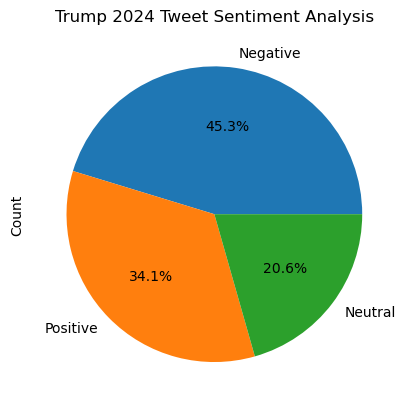

In [26]:
# Plot the sentiment counts
sentiment_counts_df.plot(kind='pie', y='Count', labels=sentiment_counts_df['Sentiment'], autopct='%1.1f%%', legend=False, title='Trump 2024 Tweet Sentiment Analysis')

